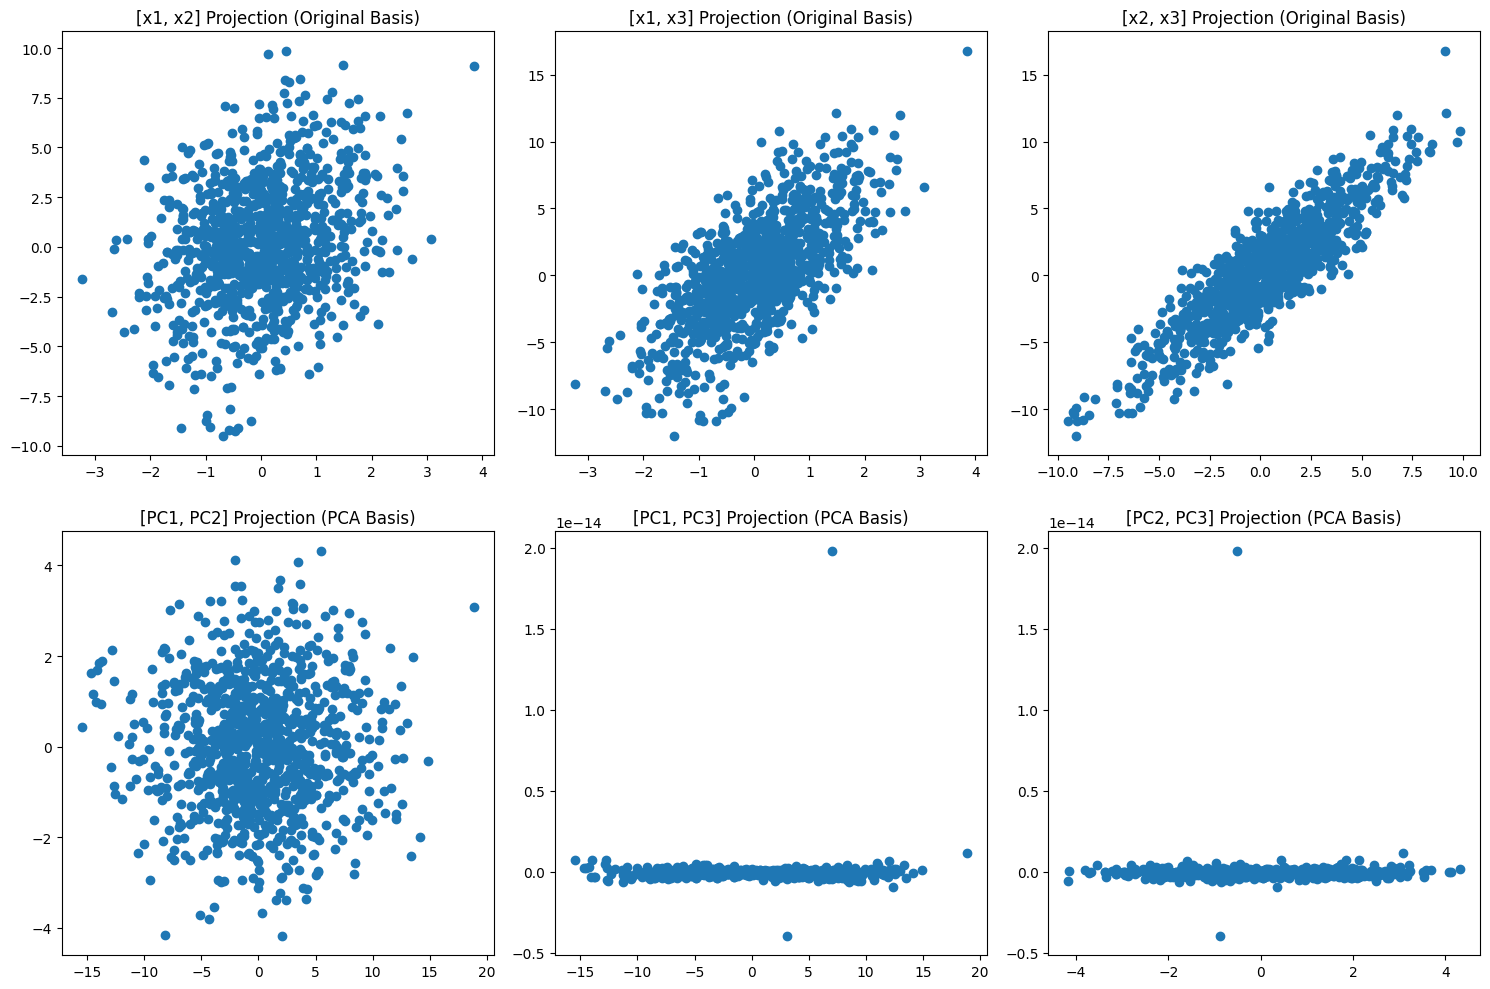

In [2]:
# excercise 8 PART ONE.PCA on 3D dataset


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import matplotlib
# matplotlib.use('TkAgg')  # Use TkAgg as the backend

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate a dataset with 3 features
N = 1000

# Generate x1, x2, and x3
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2

# Stack the features to create the dataset
data = np.column_stack((x1, x2, x3))

# Step 2: Find eigenvectors and eigenvalues using covariance matrix
cov_matrix = np.cov(data, rowvar=False)
# Finding eigenvalues using covariance matrix
eigenvalues_cov = np.linalg.eigvals(cov_matrix)

# Finding eigenvectors using covariance matrix
eigenvectors_cov = np.linalg.eig(cov_matrix)[1]

# Step 3: Find eigenvectors and eigenvalues using SVD
unused_value, singular_values, eigenvectors_svd = np.linalg.svd(data)

# Check if both procedures yield the same result
# Calculate absolute values of eigenvectors for covariance matrix and SVD
abs_eigenvectors_cov = np.abs(eigenvectors_cov)
abs_eigenvectors_svd = np.abs(eigenvectors_svd)

# Check if the absolute values of eigenvectors are close
are_eigenvectors_close = np.allclose(abs_eigenvectors_cov, abs_eigenvectors_svd)

# Step 4: Explained Variance and Dimensionality Reduction
total_variability = np.sum(eigenvalues_cov)
explained_variance_ratio = eigenvalues_cov / total_variability

# Find the minimum number of components to retain 99% of the variability
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# Find the index where cumulative explained variance reaches or exceeds 0.99
index_99 = np.argmax(cumulative_explained_variance >= 0.99)
# Add 1 to get the number of components needed to achieve 99% explained variance
num_components_99 = index_99 + 1

# Perform PCA with the selected number of components
pca = PCA(n_components=num_components_99)
data_pca = pca.fit_transform(data)

# Step 5: Plot the data in both the original and new basis
# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(15, 10)
)

# Original Basis Scatter Plots
axes[0, 0].scatter(x1, x2)
axes[0, 0].set_title('[x1, x2] Projection (Original Basis)')

axes[0, 1].scatter(x1, x3)
axes[0, 1].set_title('[x1, x3] Projection (Original Basis)')

axes[0, 2].scatter(x2, x3)
axes[0, 2].set_title('[x2, x3] Projection (Original Basis)')

# PCA Basis Scatter Plots
axes[1, 0].scatter(data_pca[:, 0], data_pca[:, 1])
axes[1, 0].set_title('[PC1, PC2] Projection (PCA Basis)')

axes[1, 1].scatter(data_pca[:, 0], data_pca[:, 2])
axes[1, 1].set_title('[PC1, PC3] Projection (PCA Basis)')

axes[1, 2].scatter(data_pca[:, 1], data_pca[:, 2])
axes[1, 2].set_title('[PC2, PC3] Projection (PCA Basis)')

plt.tight_layout()
plt.show()

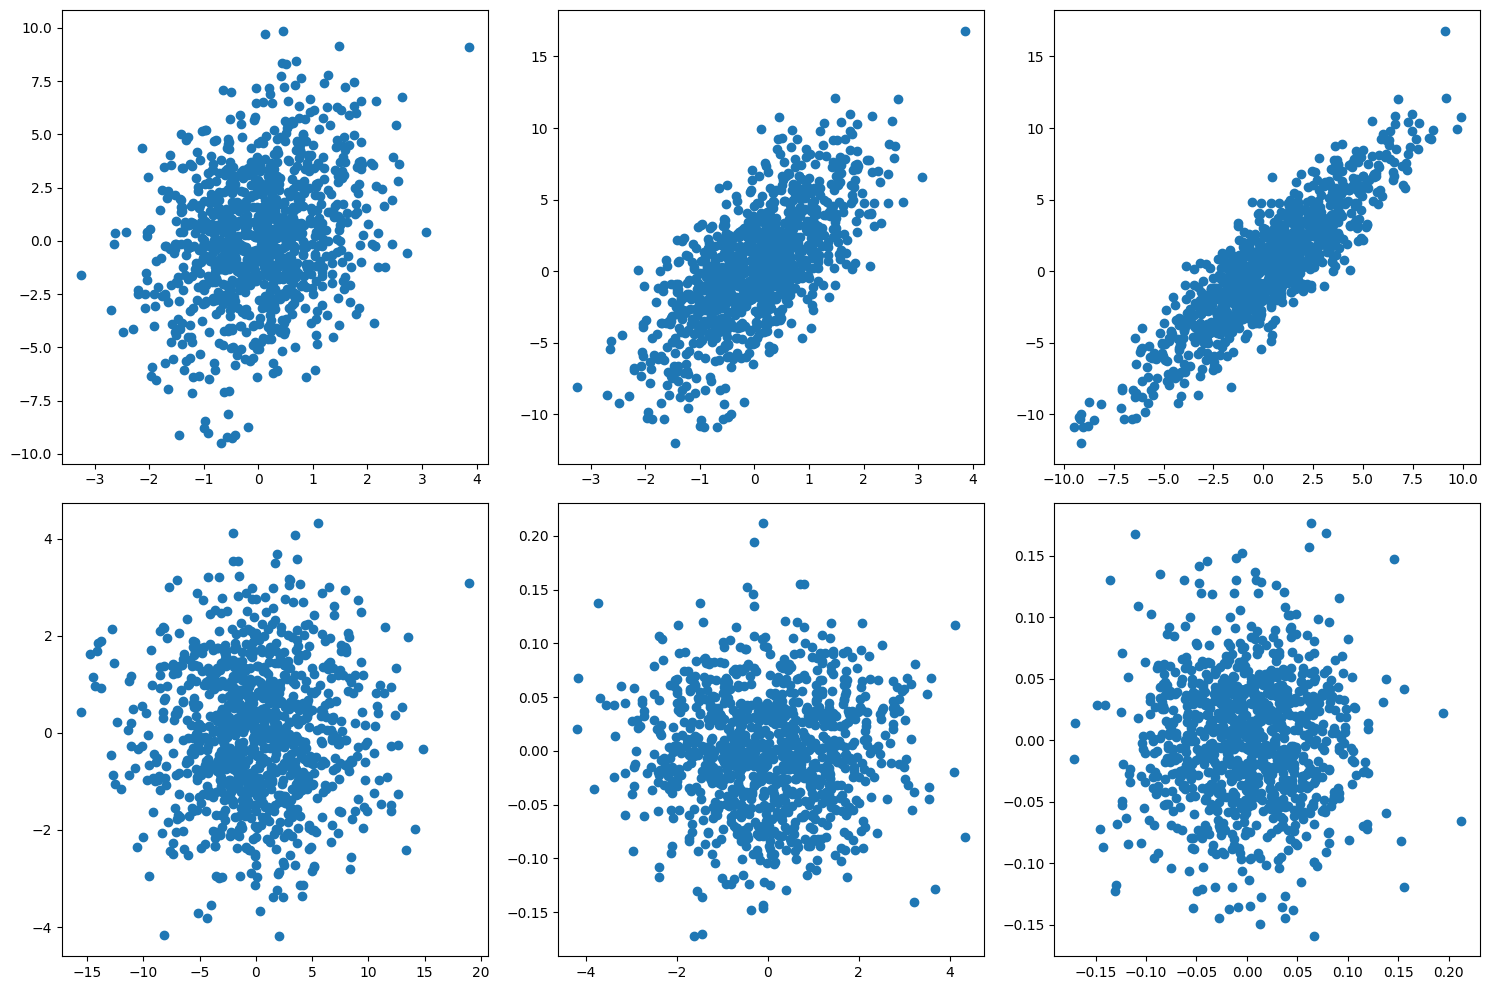

In [5]:
# excercise 8 PART TWO.PCA on a nD dataset


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import matplotlib
# matplotlib.use('TkAgg')  # Use TkAgg as the backend

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate a dataset with 3 features
N = 1000

# Generate x1, x2, and x3
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2

# Step 2: Add uncorrelated noise
num_noise_variables = 10
noise_std = 0.05
noise = np.random.normal(0, noise_std, size=(N, num_noise_variables))

# Create the extended dataset
data_extended = np.column_stack((x1, x2, x3, noise))

# Step 3: Perform PCA on the extended dataset
pca_extended = PCA()
data_pca_extended = pca_extended.fit_transform(data_extended)

# Step 4: Plot the data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original Basis Scatter Plots
axes[0, 0].scatter(x1, x2)
axes[0, 1].scatter(x1, x3)
axes[0, 2].scatter(x2, x3)

# PCA Basis Scatter Plots
num_plots = min(3, data_pca_extended.shape[1])
for i in range(num_plots):
    # Access the specific subplot in the second row and ith column
    current_subplot = axes[1, i]

    # Scatter plot for the ith and (i+1)th columns of data_pca_extended
    current_subplot.scatter(
        data_pca_extended[:, i],
        data_pca_extended[:, i + 1]
    )

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')